In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Perceptron
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading data
df = pd.read_csv('iris_perceptron_1.csv')

print('Number of unique species: ', df.species.nunique())
df.head(2)

Number of unique species:  2


,sepal length,petal width,species
0,5.1,0.2,0
1,4.9,0.2,0


In [3]:
# Standardizing data to approach global minimum quickly 
df.loc[:,df.columns[:2]] = StandardScaler().fit_transform(df.loc[:,df.columns[:2]])

In [4]:
# Rosenblatt Perceptron
model = Perceptron(epochs=5, # Number of times data needs to be iterated.
                 eta=0.9, # Learning rate between 0 to 1.
                 random_seed=42) # Reference to assign random weights. 

model.fit(df.loc[:,df.columns[:2]].values, df.species)

D:\Anaconda\lib\site-packages\mlxtend\_base\_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):


Bias:  0.3686423512911239
Weight:  5.157911228538159


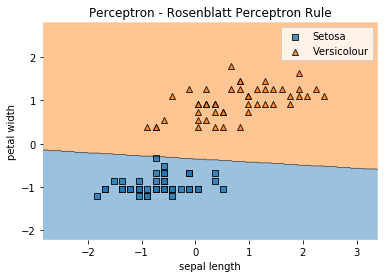

In [5]:
# Bias and weight
print('Bias: ', model.w_[0][0])
print('Weight: ', model.w_[1][0])

plot_decision_regions(df.loc[:,df.columns[:2]].values, df.species.values, clf=model)
plt.title('Perceptron - Rosenblatt Perceptron Rule')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
handles, labels =  plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Setosa', 'Versicolour'])
plt.show()

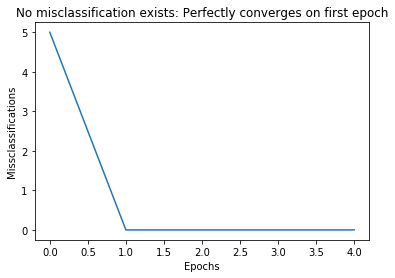

In [6]:
plt.plot(range(len(model.cost_)), model.cost_)
plt.xlabel('Epochs')
plt.ylabel('Missclassifications')
plt.title('No misclassification exists: Perfectly converges on first epoch')
plt.show()

## Perceptron limitation
Perceptron learning rule converges only if two classes can be separated with a linear hyperplane, if not then convergence can't happen.

In [7]:
df = pd.read_csv('iris_perceptron_2.csv')
print('Number of unique species: ', df.species.nunique())
df.head(2)

Number of unique species:  2


,petal length,petal width,species
0,4.7,1.4,0
1,4.5,1.5,0


Bias:  2.0818073092633504
Weight:  1.1248731750340042


D:\Anaconda\lib\site-packages\mlxtend\_base\_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):


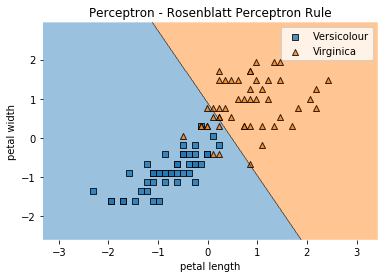

In [8]:
# Standardizing data to approach global minimum quickly 
df.loc[:,df.columns[:2]] = StandardScaler().fit_transform(df.loc[:,df.columns[:2]])

# Rosenblatt Perceptron
model = Perceptron(epochs=20, # Number of times data needs to be iterated.
                 eta=0.5, # Learning rate between 0 to 1.
                 random_seed=42) # Reference to assign random weights. 

model.fit(df.loc[:,df.columns[:2]].values, df.species)

# Bias and weight
print('Bias: ', model.w_[0][0])
print('Weight: ', model.w_[1][0])

plot_decision_regions(df.loc[:,df.columns[:2]].values, df.species.values, clf=model)
plt.title('Perceptron - Rosenblatt Perceptron Rule')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
handles, labels =  plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Versicolour', 'Virginica'])
plt.show()

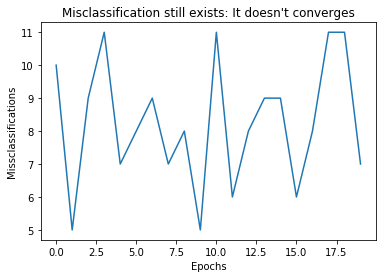

In [9]:
plt.plot(range(len(model.cost_)), model.cost_)
plt.xlabel('Epochs')
plt.ylabel('Missclassifications')
plt.title("Misclassification still exists: It doesn't converges")
plt.show()